In [4]:
# !pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)
Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl (276.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\admin\\anaconda3\\envs\\general_func\\Lib\\site-packages\\tensorflow\\include\\absl\\synchronization\\barrier.h'
Consider using the `--user` option or check the permissions.



In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [2]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'Multiclass_Classification_data'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp','png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [7]:
img = cv2.imread(os.path.join(data_dir, 'not_stop', '101.jpg'))

In [8]:
img.shape

(1080, 1920, 3)

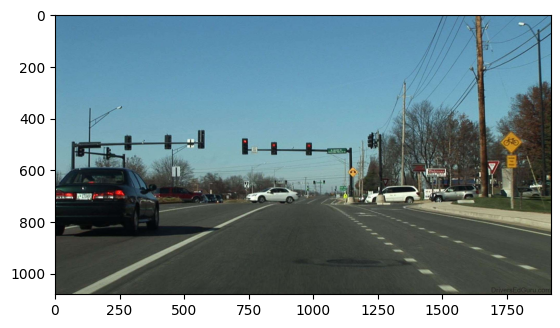

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Loading Data

In [27]:
cv2??

In [10]:
import numpy as np

In [12]:
tf.keras.utils.image_dataset_from_directory('Multiclass_Classification_data')

Found 312 files belonging to 3 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data = tf.keras.utils.image_dataset_from_directory('Multiclass_Classification_data')

Found 312 files belonging to 3 classes.


In [14]:
data.as_numpy_iterator()

In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
data_iterator.next()

(array([[[[ 80.       ,  74.       ,  51.       ],
          [ 80.       ,  74.       ,  51.       ],
          [ 80.134766 ,  73.865234 ,  51.       ],
          ...,
          [168.5957   , 176.32617  , 178.46094  ],
          [169.       , 177.       , 179.       ],
          [169.       , 177.       , 179.       ]],
 
         [[ 80.       ,  74.       ,  51.       ],
          [ 80.       ,  74.       ,  51.       ],
          [ 80.134766 ,  73.865234 ,  51.       ],
          ...,
          [168.5957   , 176.32617  , 178.46094  ],
          [169.       , 177.       , 179.       ],
          [169.       , 177.       , 179.       ]],
 
         [[ 79.865234 ,  73.865234 ,  51.       ],
          [ 79.865234 ,  73.865234 ,  51.       ],
          [ 79.98184  ,  73.76679  ,  50.98184  ],
          ...,
          [149.93593  , 157.63007  , 160.69003  ],
          [150.26758  , 158.26758  , 161.21094  ],
          [150.26758  , 158.26758  , 161.21094  ]],
 
         ...,
 
         [[ 

In [17]:
batch = data_iterator.next()

In [18]:
batch[0].shape

(32, 256, 256, 3)

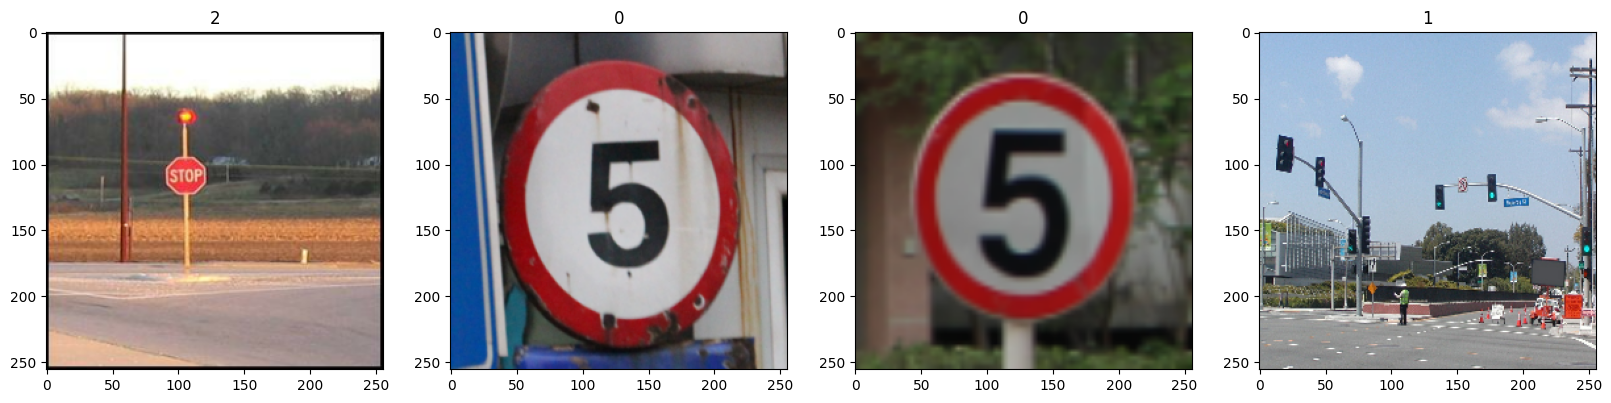

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess the data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

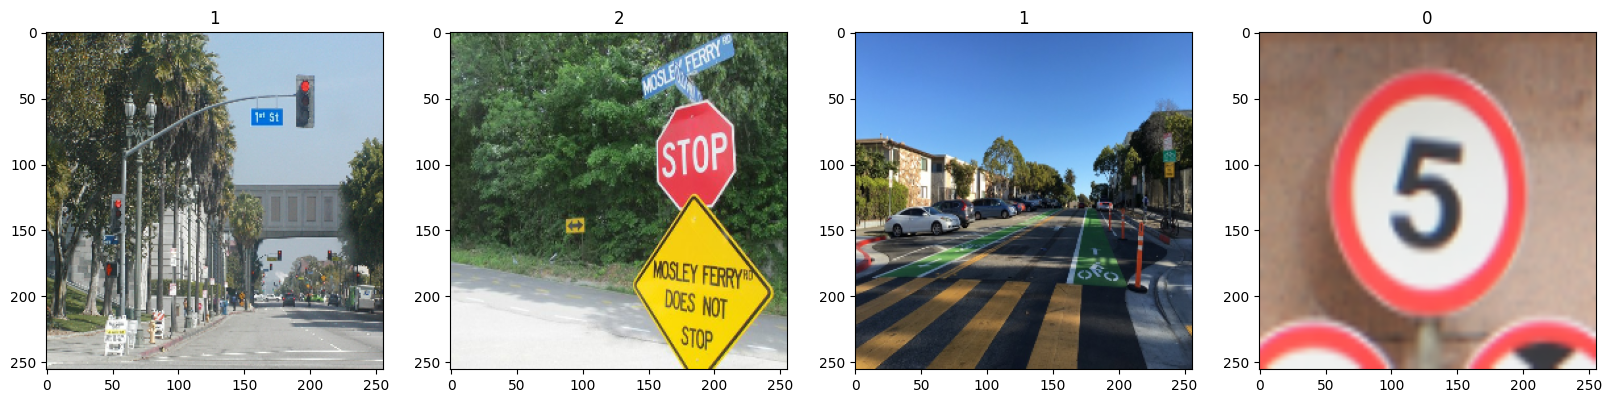

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [31]:
len(data)

10

## Split Data

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [35]:
test_size+val_size+train_size

10

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
len(train)

7

In [38]:
len(val)

2

In [39]:
len(test)

1

In [44]:
test.as_numpy_iterator().next()[0][0].shape

(256, 256, 3)

## Bulding deep learning model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
model = Sequential()

In [ ]:
data.

In [50]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3))


In [56]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training Model

In [58]:
logdir = 'Multiclass_Classification_logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 1.1931 - accuracy: 0.4732 - val_loss: 0.8331 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6462 - accuracy: 0.7366 - val_loss: 0.5734 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.3715 - accuracy: 0.8080 - val_loss: 0.4090 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.3054 - accuracy: 0.8571 - val_loss: 0.2532 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.2775 - accuracy: 0.8705 - val_loss: 0.2741 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.2283 - accuracy: 0.9152 - val_loss: 0.1885 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.1738 - accuracy: 0.9286 - val_loss: 0.1546 - val_accuracy: 0.9844
Epoch 8/20
7/7 [=====================

In [61]:
history.history

{'loss': [1.193108320236206,
  0.6461523771286011,
  0.37153974175453186,
  0.30536341667175293,
  0.27750033140182495,
  0.22832535207271576,
  0.17380604147911072,
  0.11533249169588089,
  0.04986719414591789,
  0.11245249956846237,
  0.06890390068292618,
  0.07398933917284012,
  0.06917236000299454,
  0.0221050176769495,
  0.014185226522386074,
  0.0037488804664462805,
  0.0469944141805172,
  0.06327303498983383,
  0.025761548429727554,
  0.020888185128569603],
 'accuracy': [0.4732142984867096,
  0.7366071343421936,
  0.8080357313156128,
  0.8571428656578064,
  0.8705357313156128,
  0.9151785969734192,
  0.9285714030265808,
  0.9732142686843872,
  1.0,
  0.9508928656578064,
  0.9776785969734192,
  0.9821428656578064,
  0.9866071343421936,
  1.0,
  1.0,
  1.0,
  0.9866071343421936,
  0.9776785969734192,
  1.0,
  1.0],
 'val_loss': [0.83306485414505,
  0.5733956098556519,
  0.4090127646923065,
  0.2532459795475006,
  0.2740803360939026,
  0.18847611546516418,
  0.15463203191757202,
  

## Performance

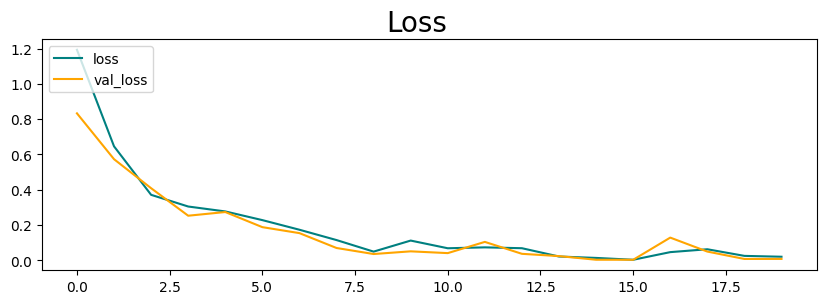

In [62]:
fig = plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

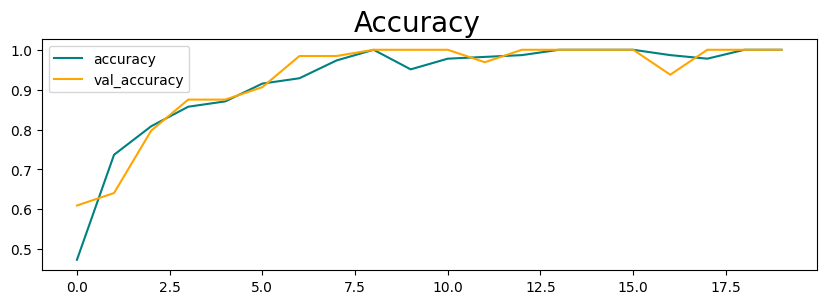

In [63]:
fig = plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating Performance

In [64]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [111]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    y_pred = np.argmax(yhat, axis=1)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 171ms/step


In [112]:
print(f'Precision {pre.result()}, Recall {re.result()}, Accuracy {acc.result()}')

Precision 1.0, Recall 1.0, Accuracy 0.7916666865348816


## Test

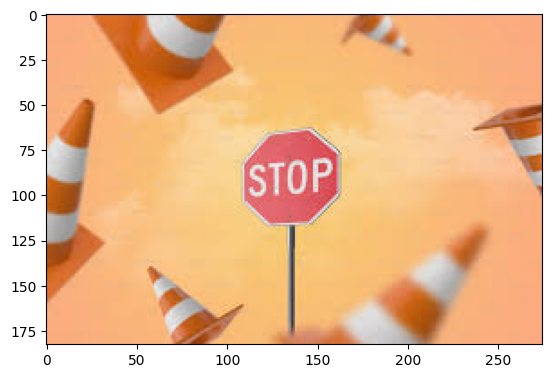

In [68]:
img = cv2.imread('Stop_Test_Image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

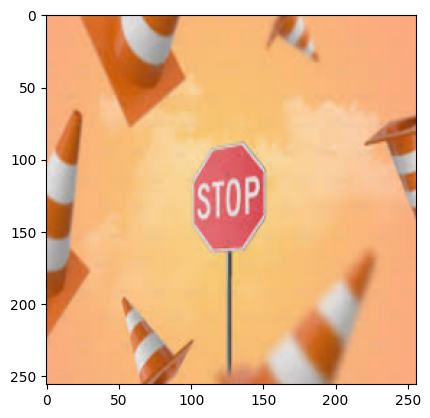

In [69]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
resize.shape

TensorShape([256, 256, 3])

In [71]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [76]:
yhat

array([[2.4142410e-06, 4.2822392e-04, 9.9956936e-01]], dtype=float32)

In [79]:
class_names = [i for i in os.listdir(data_dir)]

In [80]:
class_names

['Five_Speed_Limit', 'not_stop', 'stop']

In [81]:
class_names[np.argmax(yhat)]

'stop'

## Saving the Model

In [82]:
model.save(os.path.join('Multiclass_Classification_Model','Multiclass_Classifier.keras'))

In [83]:
from tensorflow import keras

In [84]:
loaded_model = keras.models.load_model(os.path.join('Multiclass_Classification_Model','Multiclass_Classifier.keras'))

In [85]:
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 99ms/step


In [86]:
yhat

array([[2.4142410e-06, 4.2822392e-04, 9.9956936e-01]], dtype=float32)

In [88]:
class_names[np.argmax(yhat)]

'stop'